### Análise exploratória dos dados já processados


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataframe = pd.read_csv(r'../data/processed/sinapi.csv', index_col='index')
pd.options.display.max_columns = 14
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
dataframe.info()
df = dataframe.copy()


<class 'pandas.core.frame.DataFrame'>
Index: 16848 entries, 1 to 16848
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   valor                        16848 non-null  float64
 1   unidade_da_federacao_codigo  16848 non-null  int64  
 2   unidade_da_federacao         16848 non-null  object 
 3   periodo                      16848 non-null  object 
 4   tipo_de_projeto              16848 non-null  object 
 5   padrao_de_acabamento         16848 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 921.4+ KB


# Sessão 1 - Informações Gerais e Estatísticas Básicas

In [3]:
print("Informação geral do DataFrame:")
print(df.info())

print("\nNúmero total de registros:", len(df))

print("\nEstatísticas descritivas da coluna 'valor':")
print(df['valor'].describe())

print("\nValores únicos em 'unidade_da_federacao_codigo':", df['unidade_da_federacao_codigo'].nunique())
print(df['unidade_da_federacao_codigo'].value_counts().sort_index())


Informação geral do DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 16848 entries, 1 to 16848
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   valor                        16848 non-null  float64
 1   unidade_da_federacao_codigo  16848 non-null  int64  
 2   unidade_da_federacao         16848 non-null  object 
 3   periodo                      16848 non-null  object 
 4   tipo_de_projeto              16848 non-null  object 
 5   padrao_de_acabamento         16848 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 921.4+ KB
None

Número total de registros: 16848

Estatísticas descritivas da coluna 'valor':
count    16848.000000
mean       894.850983
std        885.873646
min          0.000000
25%          0.000000
50%       1139.215000
75%       1682.225000
max       3553.930000
Name: valor, dtype: float64

Valores únicos em 'unidade_da_federacao_codigo': 

# Sessão 2 - Análise das Colunas Categóricas

In [4]:
categorical_cols = ['unidade_da_federacao', 'tipo_de_projeto', 'padrao_de_acabamento']

for col in categorical_cols:
   print(f"\nColuna: {col}")
   print("Valores únicos:", df[col].nunique())
   print(df[col].value_counts())



Coluna: unidade_da_federacao
Valores únicos: 27
unidade_da_federacao
Rondônia              624
Acre                  624
Amazonas              624
Roraima               624
Pará                  624
                     ... 
Rio Grande Do Sul     624
Mato Grosso Do Sul    624
Mato Grosso           624
Goiás                 624
Distrito Federal      624
Name: count, Length: 27, dtype: int64

Coluna: tipo_de_projeto
Valores únicos: 39
tipo_de_projeto
Casa popular, 1 pavimento, varanda, sala, 2 quartos, circulação, banheiro e cozinha                                                         432
Casa popular, 1 pavimento, sala, 2 quartos, circulação, banheiro e cozinha                                                                  432
Casa residencial, 1 pavimento, varanda, sala,2 quartos, circulação, banheiro, cozinha, área de serviço, quarto e WC de empregada            432
Casa residencial, 1 pavimento, varanda, sala,3 quartos, circulação, banheiro, lavabo, cozinha, área de serviço, qu

# Sessão 3 - Análise da Coluna de Período

In [5]:
df['periodo_dt'] = pd.to_datetime(df['periodo'], errors='coerce')

print("\nValores nulos após a conversão da coluna 'periodo':", df['periodo_dt'].isnull().sum())

print("\nIntervalo de tempo coberto pelo dataset:")
print("De:", df['periodo_dt'].min())
print("Até:", df['periodo_dt'].max())



Valores nulos após a conversão da coluna 'periodo': 0

Intervalo de tempo coberto pelo dataset:
De: 2025-01-01 00:00:00+00:00
Até: 2025-04-01 00:00:00+00:00


# Gráfico 1: Distribuição dos valores

Text(0, 0.5, 'Frequência')

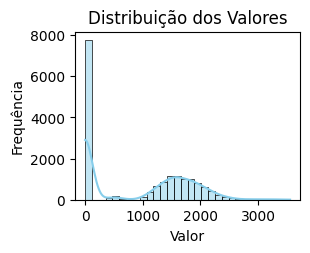

In [6]:
plt.subplot(2,2,1)
sns.histplot(df['valor'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição dos Valores')
plt.xlabel('Valor')
plt.ylabel('Frequência')


# Gráfico 2: Média de valor por UF

/tmp/ipykernel_7805/1145218028.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_val_uf.values, y=mean_val_uf.index, palette="viridis")


Text(0.5, 0, 'Valor Médio')

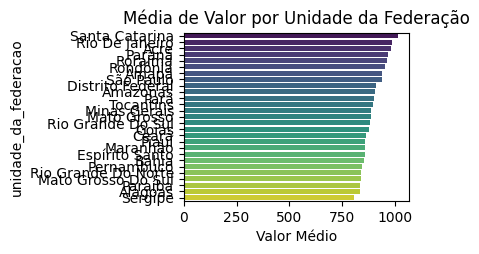

In [7]:
plt.subplot(2,2,2)
mean_val_uf = df.groupby('unidade_da_federacao')['valor'].mean().sort_values(ascending=False)
sns.barplot(x=mean_val_uf.values, y=mean_val_uf.index, palette="viridis")
plt.title('Média de Valor por Unidade da Federação')
plt.xlabel('Valor Médio')

# Gráfico 3: Série temporal da média dos valores

Text(0, 0.5, 'Valor Médio')

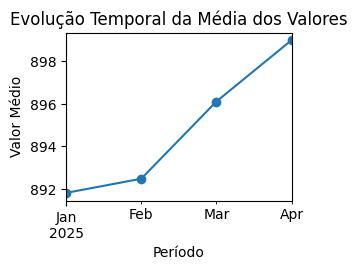

In [8]:
plt.subplot(2,2,3)
mean_val_periodo = df.groupby('periodo_dt')['valor'].mean()
mean_val_periodo.plot(marker='o', linestyle='-')
plt.title('Evolução Temporal da Média dos Valores')
plt.xlabel('Período')
plt.ylabel('Valor Médio')

# Tabela dinâmica cruzando tipo de projeto e padrão de acabamento

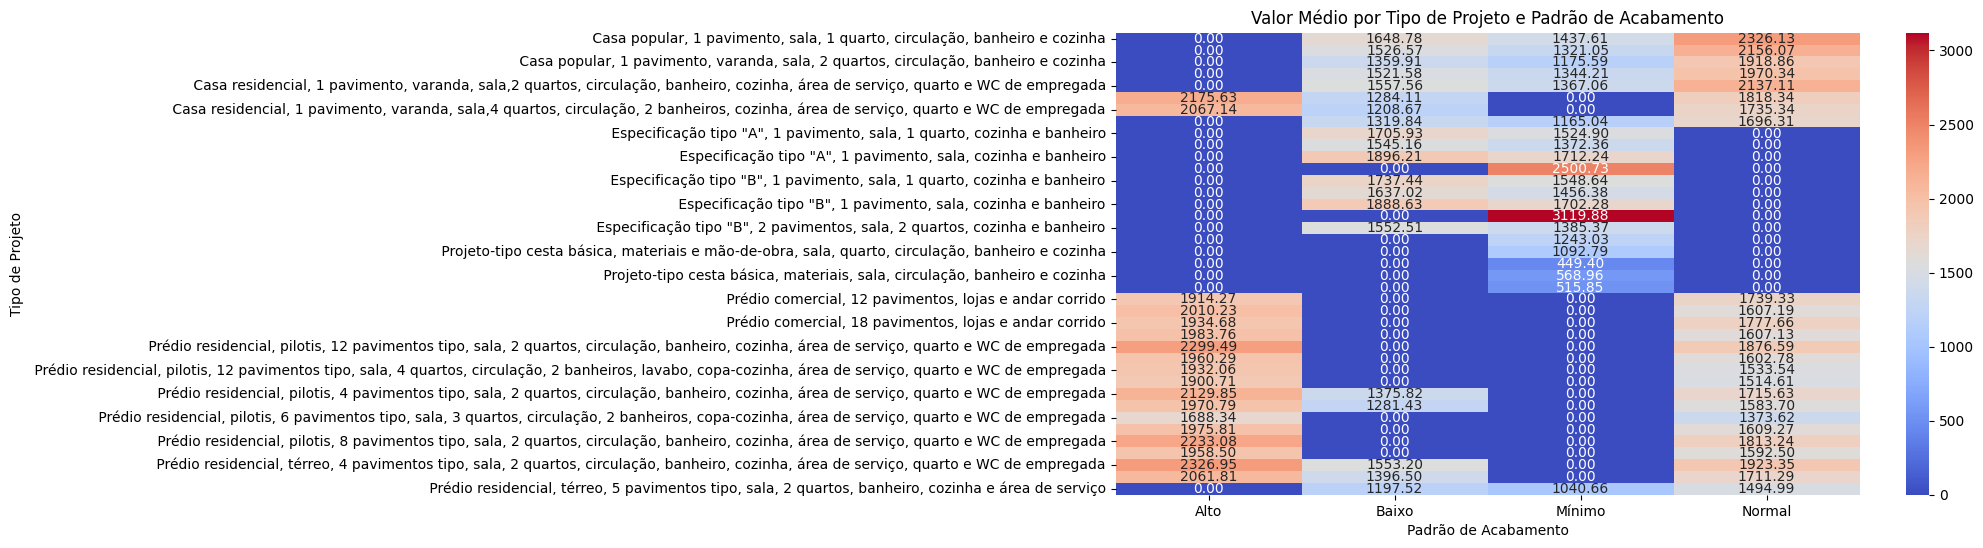

In [ ]:
pivot = df.pivot_table(values='valor',
                     index='tipo_de_projeto',
                     columns='padrao_de_acabamento',
                     aggfunc='mean')

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Valor Médio por Tipo de Projeto e Padrão de Acabamento')
plt.ylabel('Tipo de Projeto')
plt.xlabel('Padrão de Acabamento')
plt.show()
